# VGG-16 Architecture

In [1]:
# Imports
import torch
import torch.nn as nn

In [2]:
# VGG-16 architecture - convolution layer
VGG16 = [64,64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M']

In [3]:
# Create VGG-16 architecture
class VGG_net(nn.Module):
  def __init__(self, in_channels=3, num_classes=1000):
    super(VGG_net, self).__init__()
    self.in_channels = in_channels
    self.conv_layers = self.create_conv_layers(VGG16)
    self.fcs = nn.Sequential(nn.Linear(512*7*7, 4096),
                             nn.Dropout(p=0.5),
                             nn.ReLU(),
                             nn.Linear(4096, 4096),
                             nn.Dropout(p=0.5),
                             nn.ReLU(),
                             nn.Linear(4096, num_classes))

  def forward(self, x):
      x = self.conv_layers(x)
      x = x.reshape(x.shape[0], -1)
      x = self.fcs(x)
      return x

  def create_conv_layers(self, architecture):
    layers = []
    in_channels = self.in_channels

    for x in architecture:
      if type(x) == int:
        out_channels = x

        layers += [nn.Conv2d(in_channels= in_channels,
                             out_channels= out_channels,
                             kernel_size=(3,3),
                             stride=(1,1),
                             padding=(1,1)),
                   nn.BatchNorm2d(x),
                   nn.ReLU()]
        in_channels = x

      elif x == 'M':
        layers += [nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))]

    return nn.Sequential(*layers)

In [4]:
# Instantiate the model
model = VGG_net()

In [5]:
# Specify device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
# Model summary to compare params
from torchsummary import summary

summary(model.to(device), (3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
            Conv2d-4         [-1, 64, 224, 224]          36,928
       BatchNorm2d-5         [-1, 64, 224, 224]             128
              ReLU-6         [-1, 64, 224, 224]               0
         MaxPool2d-7         [-1, 64, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]          73,856
       BatchNorm2d-9        [-1, 128, 112, 112]             256
             ReLU-10        [-1, 128, 112, 112]               0
           Conv2d-11        [-1, 128, 112, 112]         147,584
      BatchNorm2d-12        [-1, 128, 112, 112]             256
             ReLU-13        [-1, 128, 112, 112]               0
        MaxPool2d-14          [-1, 128,

From the original paper, VGG-16 model should have 138 million parameters which matches with the model summary we created.

In [7]:
# Validating the model with example (1 image with shape=3x224x224)
x = torch.randn(5, 3, 224, 224)
model.to(device)(x.to(device)).shape

torch.Size([5, 1000])

# CIFAR-10 dataset

In [8]:
# Instantiate the model that gives 10 outputs for cifar-10
cifar_10_model = VGG_net(num_classes=10)

In [9]:
# Model summary
from torchsummary import summary

summary(cifar_10_model.to(device), (3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
            Conv2d-4         [-1, 64, 224, 224]          36,928
       BatchNorm2d-5         [-1, 64, 224, 224]             128
              ReLU-6         [-1, 64, 224, 224]               0
         MaxPool2d-7         [-1, 64, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]          73,856
       BatchNorm2d-9        [-1, 128, 112, 112]             256
             ReLU-10        [-1, 128, 112, 112]               0
           Conv2d-11        [-1, 128, 112, 112]         147,584
      BatchNorm2d-12        [-1, 128, 112, 112]             256
             ReLU-13        [-1, 128, 112, 112]               0
        MaxPool2d-14          [-1, 128,

## Load CIFAR-10 dataset

In [10]:
import torch
import torchvision
import torchvision.transforms as transforms

# Define the transformations to apply to the CIFAR-10 data
transform = transforms.Compose([transforms.Resize((224,224)), #<-- Resize for VGG input
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

# Download and load train and test data
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:04<00:00, 42131435.38it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [11]:
train_dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [12]:
train_dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [13]:
test_dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [14]:
feature, label = train_dataset[0]
feature.shape , label

(torch.Size([3, 224, 224]), 6)

Label:  frog (6)


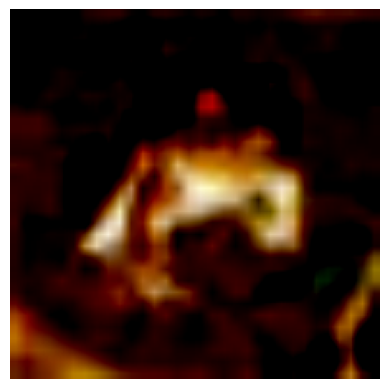

In [15]:
# Let's visualize the first image in the train_dataset
import matplotlib.pyplot as plt

# Permute the image tensor from 3x224x224 to 224x224x3
image = torch.permute(feature, (1, 2, 0))

# Display the image
plt.imshow(image)
print('Label: ', train_dataset.classes[label], "("+str(label)+")")
plt.axis('off') # To remove axis label
plt.show()

## DataLoader for train-test Dataset

In [16]:
from torch.utils.data import random_split
val_size = 5000
train_size = len(train_dataset) - val_size

train_ds, val_ds = random_split(train_dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [17]:
# Load the above split data
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_ds, batch_size=64, shuffle=True)

In [18]:
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [19]:
# Example from train_loader
train_iterate = iter(train_loader)
features, labels = next(train_iterate)
features.shape

torch.Size([64, 3, 224, 224])

Thus, there are 64 images in a  batch with shape 3x224x224.

# Training Loop

## Train training dataset of CIFAR-10

In [24]:
# Instantiate model
model_train = VGG_net(num_classes=10)

In [25]:
# Define the optimizer
optimizer = torch.optim.Adam(model_train.parameters(), lr=0.0001) # Decrease the lr, because batch normalization

# Define the loss function
criterion = nn.CrossEntropyLoss()

**Note:** The learning rate is decreases and significantly smaller because the architecture has batch normalization layer added after every convolutional layer.

- Batch normalization helps in addressing the internal covariate shift problem during training. It normalizes the input across the batch dimension, making the distribution of each feature more consistent and stabilizing the learning process. This can lead to faster convergence, better generalization, and improved overall performance of the model.

In [26]:
model_train = model_train.to(device)

In [27]:
from tqdm import tqdm
import time

history_tl = []
history_ta=[]

num_epochs = 10

for epoch in tqdm(range(num_epochs), desc='Epochs'):
    model_train.train()  # Set the model to training mode

    start_time = time.time() # Start time of the epoch

    running_loss = 0.0
    running_corrects = 0

    # Iterate over the training data in batches
    for inputs, labels in train_loader:
        # Move the inputs and labels to the selected device
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model_train(inputs)

        torch.cuda.empty_cache() # Limit GPU memory growth

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        torch.cuda.empty_cache() # Limit GPU memory growth

        # Update running loss and accuracy
        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1) # the maximum value and the index of that maximum value along dimension 1
        running_corrects += torch.sum(preds == labels.data) # labels.data gives access to underlying labels tensor

    end_time = time.time()  # End time of the epoch
    epoch_duration = end_time - start_time  # Duration of the epoch

    # Print the epoch duration
    tqdm.write(f"Epoch {epoch+1} completed in {epoch_duration:.2f} seconds")

    # Calculate epoch loss and accuracy for training data
    epoch_loss = running_loss / train_size
    epoch_acc = running_corrects.double() / train_size

    history_tl.append(epoch_loss)
    history_ta.append(epoch_acc)

    # Print the loss and accuracy for training and validation data
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.4f}")

    # Save the model weights after every epoch
    torch.save(model.state_dict(), 'model_weights_epoch{}.pth'.format(epoch))


Epochs:   0%|          | 0/10 [15:18<?, ?it/s]

Epoch 1 completed in 918.25 seconds
Epoch [1/10], Train Loss: 1.5599, Train Accuracy: 0.4227


Epochs:  10%|█         | 1/10 [30:45<2:19:21, 929.03s/it]

Epoch 2 completed in 916.86 seconds
Epoch [2/10], Train Loss: 1.0430, Train Accuracy: 0.6304


Epochs:  20%|██        | 2/10 [46:08<2:03:22, 925.37s/it]

Epoch 3 completed in 916.34 seconds
Epoch [3/10], Train Loss: 0.7997, Train Accuracy: 0.7183


Epochs:  30%|███       | 3/10 [1:01:30<1:47:49, 924.20s/it]

Epoch 4 completed in 916.18 seconds
Epoch [4/10], Train Loss: 0.6668, Train Accuracy: 0.7673


Epochs:  40%|████      | 4/10 [1:16:52<1:32:20, 923.38s/it]

Epoch 5 completed in 915.66 seconds
Epoch [5/10], Train Loss: 0.5784, Train Accuracy: 0.7987


Epochs:  50%|█████     | 5/10 [1:32:10<1:16:47, 921.43s/it]

Epoch 6 completed in 915.81 seconds
Epoch [6/10], Train Loss: 0.5199, Train Accuracy: 0.8213


Epochs:  60%|██████    | 6/10 [1:47:34<1:01:26, 921.73s/it]

Epoch 7 completed in 916.99 seconds
Epoch [7/10], Train Loss: 0.4484, Train Accuracy: 0.8441


Epochs:  70%|███████   | 7/10 [2:02:58<46:06, 922.31s/it]

Epoch 8 completed in 917.80 seconds
Epoch [8/10], Train Loss: 0.3997, Train Accuracy: 0.8634


Epochs:  80%|████████  | 8/10 [2:18:20<30:45, 922.77s/it]

Epoch 9 completed in 916.33 seconds
Epoch [9/10], Train Loss: 0.3525, Train Accuracy: 0.8773


Epochs:  90%|█████████ | 9/10 [2:33:44<15:22, 922.79s/it]

Epoch 10 completed in 917.13 seconds
Epoch [10/10], Train Loss: 0.3242, Train Accuracy: 0.8876


Epochs: 100%|██████████| 10/10 [2:33:50<00:00, 923.02s/it]


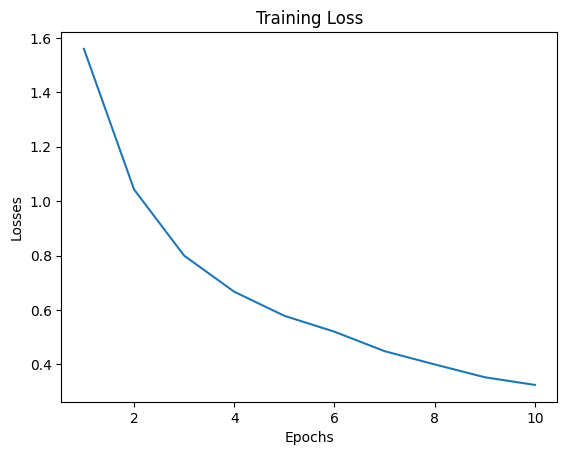

In [28]:
epochs = range(1, len(history_tl)+1)

# Plot losses
plt.plot(epochs, history_tl)
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Training Loss")
plt.show()

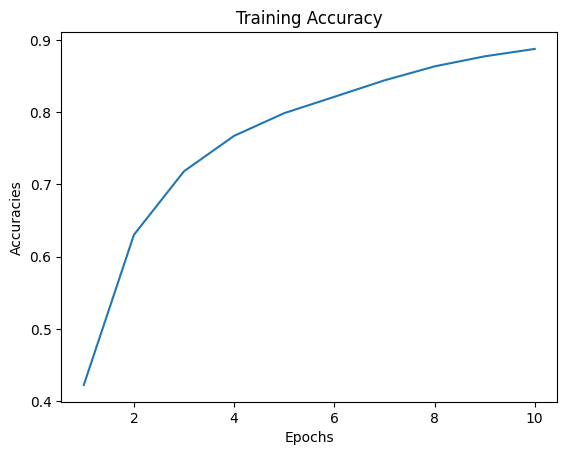

In [30]:
import numpy as np

# Plot epoch vs accuracy
history_acc = np.array([acc.cpu().numpy() for acc in history_ta])
plt.plot(epochs, history_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Training Accuracy")
plt.show()

## Test testing dataset of CIFAR-10

In [31]:
correct = 0
total = 0

with torch.no_grad(): # Disabling gradient calculation, since testing doesnot require weight update
    model_train.eval() # Set the model to evaluation mode

    for inputs, labels in test_loader:
      # Move the inputs and labels to the selected device
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model_train(inputs)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 83.02%


In [32]:
# Function that predicts the input image from unseen dataset
def predict_image(img):
  # Convert to a batch of 1
  xb = img.unsqueeze(0).to(device)
  # Get predictions from model
  yb = model_train(xb)
  # Pick index with highest probability
  _, preds  = torch.max(yb, dim=1)

  return preds.item()

Actual Label:  ship (8)
Predicted Label:  ship (8)


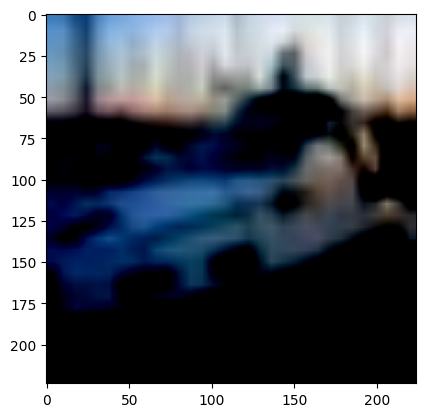

In [33]:
# For third image in dataset
img, label = test_dataset[2]
plt.imshow(img.permute(1,2,0))

predicted = predict_image(img)
print('Actual Label: ', test_dataset.classes[label], "("+str(label)+")")
print('Predicted Label: ', test_dataset.classes[predicted], "("+str(predicted)+")")

Actual Label:  airplane (0)
Predicted Label:  airplane (0)


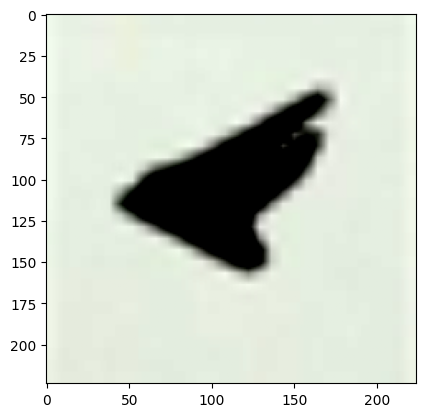

In [34]:

# For 22nd image in dataset
img, label = test_dataset[21]
plt.imshow(img.permute(1,2,0))

predicted = predict_image(img)
print('Actual Label: ', test_dataset.classes[label], "("+str(label)+")")
print('Predicted Label: ', test_dataset.classes[predicted], "("+str(predicted)+")")


Actual Label:  frog (6)
Predicted Label:  frog (6)


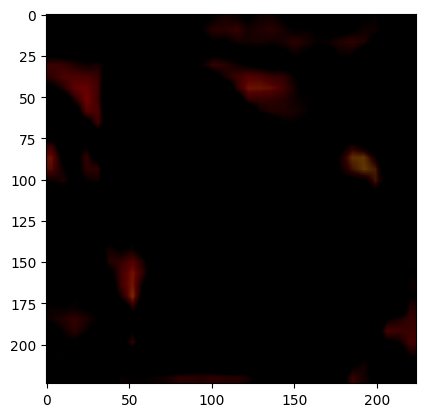

In [35]:

# For 31st image in dataset
img, label = test_dataset[30]
plt.imshow(img.permute(1,2,0))

predicted = predict_image(img)
print('Actual Label: ', test_dataset.classes[label], "("+str(label)+")")
print('Predicted Label: ', test_dataset.classes[predicted], "("+str(predicted)+")")
